<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/adaline_regression_salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaline for regression: annual salary dataset

In [113]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from google.colab import files

Upload your dataset

In [114]:
files.upload()
data = pd.read_csv("Salary_Data.csv")#, header=None)
#print(data.tail())

Saving Salary_Data.csv to Salary_Data (3).csv


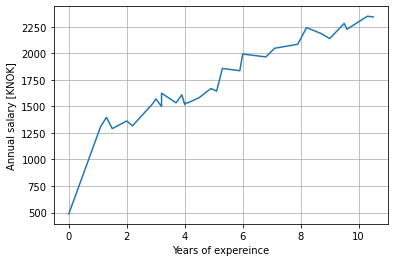

In [132]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values
plt.plot(x,y*10**-3)
plt.xlabel('Years of expereince')
plt.ylabel('Annual salary [KNOK]')
plt.grid()
plt.show()

In [133]:
class adaline(object):
  def __init__(self, epochs=100, eta=0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels):
    x = training_inputs
    t = training_labels
    self.cost = []   # to plot cost function over epochs
    self.w = random.rand(training_inputs.ndim+1)
    for i in range(self.epochs):
      net = np.dot(x, self.w[1])+self.w[0]
      y = net  #linear activation function
      error = (t - y)   # this is vector
      #update weights using sum of gradients
      self.w[1:] += self.eta *  (np.dot(error, x)).mean()
      self.w[0] += self.eta * error.mean()
      cost = 0.5 * (error**2).sum()
      self.cost.append(cost)
    return self
  
  def predict(self, inputs):
    net=np.dot(inputs, self.w[1])+self.w[0]
    return(net) 

273277315998.03598
[1697073.26404082  380044.39452785]


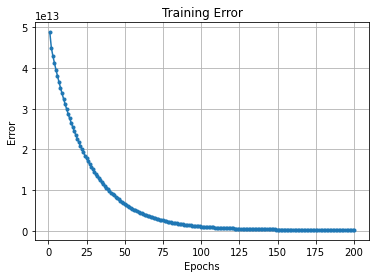

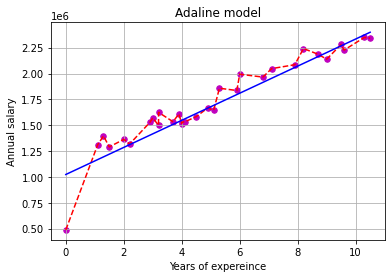

In [157]:
# scaled feture
xn = (x-x.mean(axis=0))/x.std(axis=0)

model=adaline(epochs=200, eta=0.02)
model.train(xn, y)
y_pred = model.predict(xn)

print(model.cost[-1])
print(model.w)
#print(predictions)

plt.plot(range(1,len(model.cost)+1), model.cost, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

plt.plot(x, y, 'r--', x, y_pred,'b-')
plt.scatter(x, y, color = "m", marker = "o", s = 30) 
plt.xlabel('Years of expereince')
plt.ylabel('Annual salary')
plt.title('Adaline model')
plt.grid()
plt.show()

In [147]:
#Stadnard linear regression(https://www.geeksforgeeks.org/linear-regression-python-implementation/)
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title("regression model")
    plt.grid()
    plt.show() 

(1053819.832474769, 131008.21953125572)


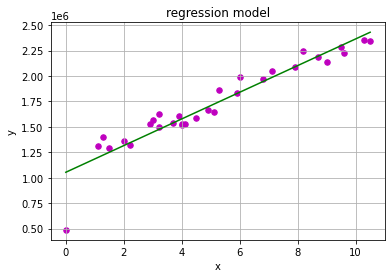

In [148]:
b = estimate_coef(x,y)
print(b)

plot_regression_line(x,y,b)